# House Price Analysis of Ames, Iowa (2006-2010)

During the past six months, my hudsbend and I have sold a house, bought, sold again, and now back on the market looking for yet another one! Not that we are crazy, but we have had some pleasant changes in live -- a new baby (yeah!) and then a new job that requires relocation.
                                                                                
In this notebook, I will take a look at this small competition dataset (one town in Iowa) to have a peak of real estate sales. And based on the dataset scope, I aim to answer the following questions:

 - 1. How expensive is this town to live in?
 - 2. How do real estate markets differ for different neighborhoods in Ames,Iowa?
 - 3. How do my preferences( e.g. house age, bathroom/bedrooms ratio, firstfloor sqft etc) relate to house price?

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [23]:
# load data
data = pd.read_csv('data/train.csv')
print("Basic description of dataset: ")
print ('\t'+"{} rows".format(data.shape[0]))
print ('\t'+"{} columns".format(data.shape[1]))

Basic description of dataset: 
	1460 rows
	81 columns


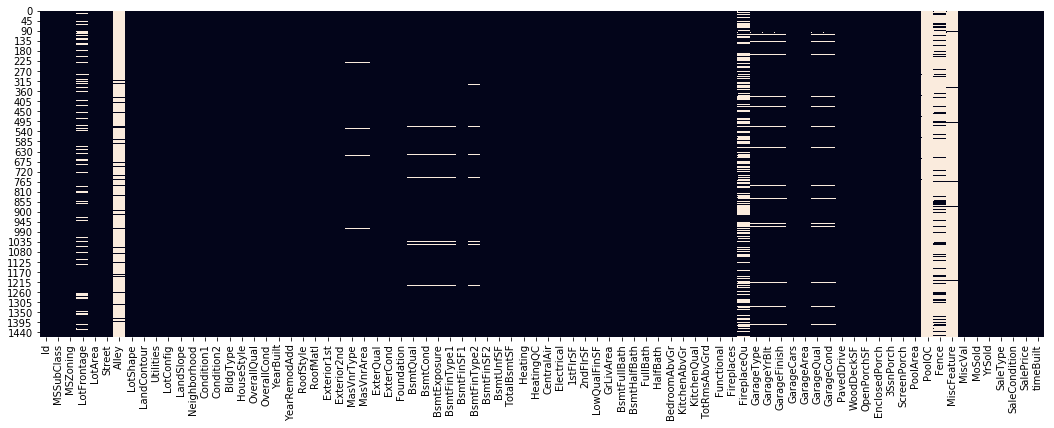

In [190]:
plt.figure(figsize=(18,6))
sns.heatmap(data.isnull(),cbar=False)

### Question 1 How expensive is this town to live in?

To gain a basic picture of the house market of Ames, we'll first take look at the distribution of house sale price:

In [75]:
print("Number of rows that are missing sale price : {}"
      .format(data.SalePrice.isnull().sum()))

Number of rows that are missing sale price : 0


In [34]:
data.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

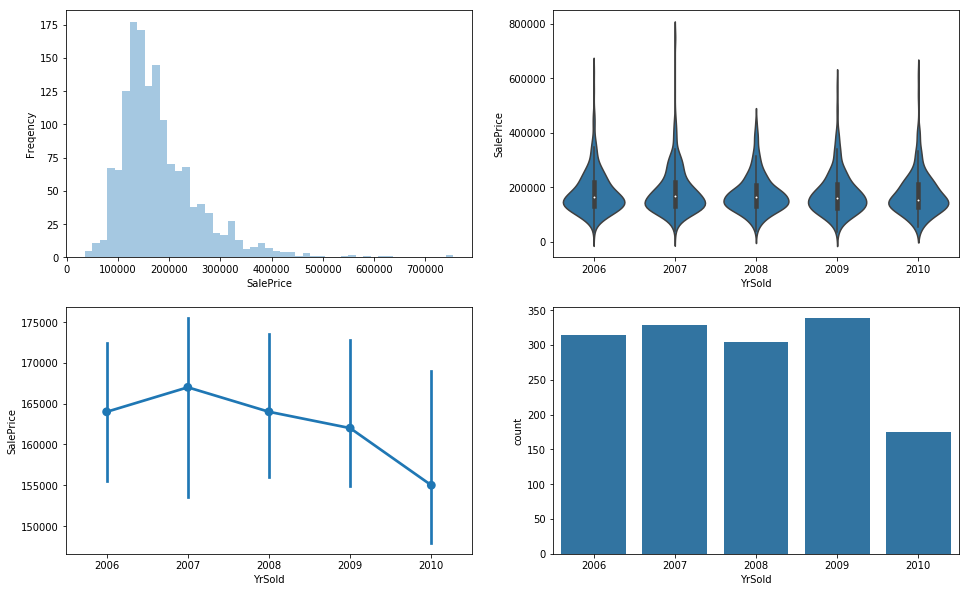

In [77]:
plt.figure(figsize=(16,10))
plt.subplot(221)
sns.distplot(data.SalePrice,kde=False)
plt.ylabel("Freqency")
plt.subplot(222)
base_color = sns.color_palette()[0]
sns.violinplot(data=data,x="YrSold",y='SalePrice',color=base_color)
plt.subplot(223)
from numpy import median
sns.pointplot(data=data,x="YrSold",y='SalePrice',estimator=median)
plt.subplot(224)
sns.countplot(data.YrSold,color=base_color)

### Question 2 which are the popular neighborhoods?

In [189]:
data[['Neighborhood','YearBuilt']].isnull().sum()

Neighborhood    0
YearBuilt       0
dtype: int64

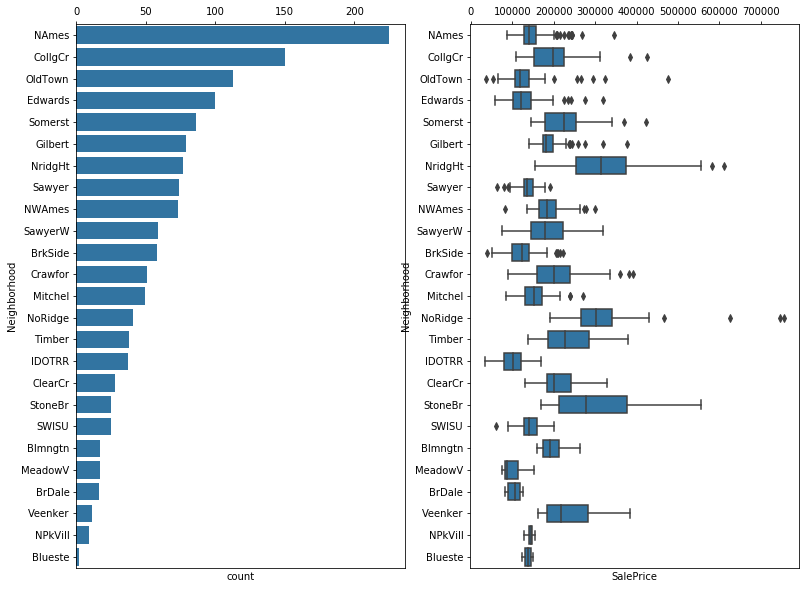

In [313]:
plt.figure(figsize=(20,10))
cat_order = data.Neighborhood.value_counts().index
plt.subplot(131)
ax1 = sns.countplot(data=data,y='Neighborhood',color=base_color,order=cat_order)
ax1.xaxis.tick_top()
plt.subplot(132)
ax2 = sns.boxplot(data=data,y="Neighborhood",x='SalePrice',color=base_color,order=cat_order)
ax2.xaxis.tick_top()

### Question 3: How much shoud I budget for if I were to buy a house in Ames that fits my preferences?

In [320]:
data[['Neighborhood','YearBuilt','LotArea','BedroomAbvGr','FullBath']].isnull().sum()

Neighborhood    0
YearBuilt       0
LotArea         0
BedroomAbvGr    0
FullBath        0
dtype: int64

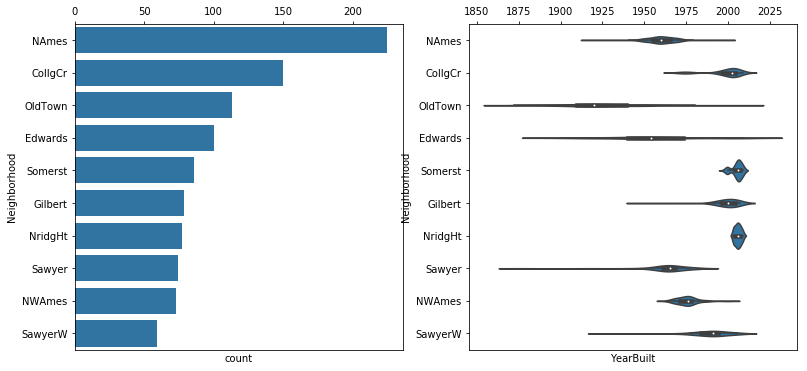

In [312]:
plt.figure(figsize=(20,6))
cat_order = data.Neighborhood.value_counts().index
plt.subplot(131)
ax1 = sns.countplot(data=data,y='Neighborhood',color=base_color,order=cat_order[:10])
ax1.xaxis.tick_top()
plt.subplot(132)
ax2 = sns.violinplot(data=data,y="Neighborhood",x='YearBuilt',color=base_color,order=cat_order[:10])
ax2.xaxis.tick_top()

In [314]:
preferred_neighborhood=['NAmes','CollgCr','Somerst','Gilbert','NridgHt','SawyerW']

In [343]:
fits=data[(data.Neighborhood.isin(preferred_neighborhood))\
     &(data.YearBuilt>=1980)\
    &(data.BedroomAbvGr.isin([3,4]))\
      &(data.FullBath.isin([3,4]))]

In [344]:
fits

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,timeBuilt,logSalePrice
11,12,60,RL,85.0,11924,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2005,2006,Hip,CompShg,WdShing,Wd Shng,Stone,286.0,Ex,TA,PConc,Ex,TA,No,GLQ,998,Unf,0,177,1175,GasA,Ex,Y,SBrkr,1182,1142,0,2324,1,0,3,0,4,1,Ex,11,Typ,2,Gd,BuiltIn,2005.0,Fin,3,736,TA,TA,Y,147,21,0,0,0,0,NaN,NaN,NaN,0,7,2006,New,Partial,345000,"[2000, 2010)",12.751300
20,21,60,RL,101.0,14215,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,380.0,Gd,TA,PConc,Ex,TA,Av,Unf,0,Unf,0,1158,1158,GasA,Ex,Y,SBrkr,1158,1218,0,2376,0,0,3,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2005.0,RFn,3,853,TA,TA,Y,240,154,0,0,0,0,NaN,NaN,NaN,0,11,2006,New,Partial,325300,"[2000, 2010)",12.692503
35,36,60,RL,108.0,13418,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,132.0,Gd,TA,PConc,Ex,TA,Av,Unf,0,Unf,0,1117,1117,GasA,Ex,Y,SBrkr,1132,1320,0,2452,0,0,3,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2004.0,Fin,3,691,TA,TA,Y,113,32,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Normal,309000,"[2000, 2010)",12.641097
320,321,60,RL,111.0,16259,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,Stone,370.0,TA,TA,PConc,Ex,Gd,Av,Unf,0,Unf,0,1249,1249,GasA,Ex,Y,SBrkr,1249,1347,0,2596,0,0,3,1,4,1,Gd,9,Typ,0,NaN,Attchd,2006.0,RFn,3,840,TA,TA,Y,240,154,0,0,0,0,NaN,NaN,NaN,0,9,2006,New,Partial,342643,"[2000, 2010)",12.744444
377,378,60,FV,102.0,11143,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,2Story,8,5,2004,2005,Gable,CompShg,CemntBd,CmentBd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1580,1580,GasA,Ex,Y,SBrkr,1580,886,0,2466,0,0,3,0,4,1,Gd,8,Typ,1,Gd,Attchd,2004.0,RFn,2,610,TA,TA,Y,159,214,0,0,0,0,NaN,NaN,NaN,0,12,2007,WD,Normal,340000,"[2000, 2010)",12.736701
686,687,60,FV,84.0,10207,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,6,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,874,874,GasA,Ex,Y,SBrkr,874,887,0,1761,0,0,3,0,3,1,Gd,7,Typ,0,NaN,Attchd,2007.0,Fin,2,578,TA,TA,Y,144,105,0,0,0,0,NaN,NaN,NaN,0,8,2007,New,Partial,227875,"[2000, 2010)",12.336553
798,799,60,RL,104.0,13518,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,Stone,860.0,Ex,TA,PConc,Ex,TA,No,Unf,0,Unf,0,1926,1926,GasA,Ex,Y,SBrkr,1966,1174,0,3140,0,0,3,1,4,1,Ex,11,Typ,2,Gd,BuiltIn,2009.0,Fin,3,820,TA,TA,Y,144,78,0,0,0,0,NaN,NaN,NaN,0,7,2009,New,Partial,485000,"[2000, 2010)",13.091904
803,804,60,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,Stone,424.0,Ex,TA,PConc,Ex,TA,Gd,Unf,0,Unf,0,1734,1734,GasA,Ex,Y,SBrkr,1734,1088,0,2822,0,0,3,1,4,1,Ex,12,Typ,1,Gd,BuiltIn,2009.0,RFn,3,1020,TA,TA,Y,52,170,0,0,192,0,NaN,NaN,NaN,0,1,2009,New,Partial,582933,"[2000, 2010)",13.275828
1142,1143,60,RL,77.0,9965,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,Stone,340.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1150,Unf,0,316,1466,GasA,Ex,Y,SBrkr,1466,1362,0,2828,1,0,3,0,4,1,Gd,11